In [10]:
from data_generator import ssp_data
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from torchinfo import summary

In [4]:
ssp_obj = ssp_data()
ssp_obj.to_pickle('data_pickle')

Processing data\tas_scenario_245\tas_mon_mod_ssp245_192_001.nc


KeyboardInterrupt: 

In [11]:
file = open('data_pickle', 'rb')
ssp_obj = pickle.load(file)
file.close()

In [12]:
ssp_obj.train_data = ssp_obj.test_data
ssp_obj.train_data

Data(x=[39, 163800], edge_index=[2, 1482], y=[163800])

In [13]:
ssp_obj.train_data.y

tensor([285.1003, 285.9076, 282.4460,  ..., 296.6862, 297.5055, 298.2751])

In [14]:
ssp_obj.train_data

Data(x=[39, 163800], edge_index=[2, 1482], y=[163800])

In [51]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn.pool import global_mean_pool
import torch

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.edge_weight = torch.nn.Parameter(torch.ones(ssp_obj.train_data.num_edges))
        self.conv1 = GCNConv(-1, 36)
        self.conv2 = GCNConv(36, 64)
        # self.lin1 = torch.nn.Linear(64, 256)
        self.lin1 = torch.nn.Linear(64, 163800)
        # self.global_pool = global_mean_pool()

    def forward(self, data, batch):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, torch.minimum(self.edge_weight.abs(),torch.ones(data.num_edges)))
        x = self.lin1(x)
        x = global_mean_pool(x, batch)
        x = x.flatten()
        return x


In [52]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
train_data = ssp_obj.train_data.to(device)
# test_data = ssp_obj.test_data.to(device)
train_loss_l = []
# test_loss_l = []
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=5e-4)

model.train()
for epoch in range(8000):
    optimizer.zero_grad()
    out = model(train_data, train_data.batch)
    train_loss = F.mse_loss(out, train_data.y)
    train_loss_l.append(train_loss.item())

    # test_out = model(test_data)
    # test_loss = F.mse_loss(test_out, test_data.y)
    # test_loss_l.append(test_loss.item())

    print(epoch, train_loss)
    train_loss.backward()
    optimizer.step()

0 tensor(119825.8438, grad_fn=<MseLossBackward0>)
1 tensor(1.1555e+13, grad_fn=<MseLossBackward0>)
2 tensor(6.7426e+13, grad_fn=<MseLossBackward0>)
3 tensor(1.1333e+10, grad_fn=<MseLossBackward0>)
4 tensor(4.0541e+11, grad_fn=<MseLossBackward0>)
5 tensor(1.1107e+08, grad_fn=<MseLossBackward0>)
6 tensor(85242.1250, grad_fn=<MseLossBackward0>)
7 tensor(85325.8906, grad_fn=<MseLossBackward0>)
8 tensor(85411.3906, grad_fn=<MseLossBackward0>)
9 tensor(85496.3906, grad_fn=<MseLossBackward0>)
10 tensor(85579.4922, grad_fn=<MseLossBackward0>)
11 tensor(85659.7188, grad_fn=<MseLossBackward0>)
12 tensor(85736.4688, grad_fn=<MseLossBackward0>)
13 tensor(85809.3594, grad_fn=<MseLossBackward0>)
14 tensor(85878.1875, grad_fn=<MseLossBackward0>)
15 tensor(85942.8984, grad_fn=<MseLossBackward0>)
16 tensor(86003.4375, grad_fn=<MseLossBackward0>)
17 tensor(86059.9141, grad_fn=<MseLossBackward0>)
18 tensor(86112.4219, grad_fn=<MseLossBackward0>)
19 tensor(86161.1016, grad_fn=<MseLossBackward0>)
20 tensor

KeyboardInterrupt: 

In [19]:
for epoch in range(8000):
    optimizer.zero_grad()
    out = model(train_data, train_data.batch)
    train_loss = F.mse_loss(out, train_data.y)
    train_loss_l.append(train_loss.item())

    # test_out = model(test_data)
    # test_loss = F.mse_loss(test_out, test_data.y)
    # test_loss_l.append(test_loss.item())

    print(epoch, train_loss)
    train_loss.backward()
    optimizer.step()

C:\Users\jqcla\AppData\Local\Temp\ipykernel_5360\57309726.py:4: UserWarning: Using a target size (torch.Size([163800])) that is different to the input size (torch.Size([1, 163800])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  train_loss = F.mse_loss(out, train_data.y)


0 tensor(2983.2488, grad_fn=<MseLossBackward0>)
1 tensor(2983.2231, grad_fn=<MseLossBackward0>)
2 tensor(2983.1978, grad_fn=<MseLossBackward0>)
3 tensor(2983.1721, grad_fn=<MseLossBackward0>)
4 tensor(2983.1467, grad_fn=<MseLossBackward0>)
5 tensor(2983.1211, grad_fn=<MseLossBackward0>)
6 tensor(2983.0957, grad_fn=<MseLossBackward0>)
7 tensor(2983.0698, grad_fn=<MseLossBackward0>)
8 tensor(2983.0442, grad_fn=<MseLossBackward0>)
9 tensor(2983.0188, grad_fn=<MseLossBackward0>)
10 tensor(2982.9934, grad_fn=<MseLossBackward0>)
11 tensor(2982.9678, grad_fn=<MseLossBackward0>)
12 tensor(2982.9419, grad_fn=<MseLossBackward0>)
13 tensor(2982.9167, grad_fn=<MseLossBackward0>)
14 tensor(2982.8914, grad_fn=<MseLossBackward0>)
15 tensor(2982.8657, grad_fn=<MseLossBackward0>)
16 tensor(2982.8398, grad_fn=<MseLossBackward0>)
17 tensor(2982.8149, grad_fn=<MseLossBackward0>)
18 tensor(2982.7893, grad_fn=<MseLossBackward0>)
19 tensor(2982.7639, grad_fn=<MseLossBackward0>)
20 tensor(2982.7385, grad_fn=<

KeyboardInterrupt: 

In [20]:
model.edge_weight

Parameter containing:
tensor([4.6932e-20, 4.9169e-20, 3.3778e-20,  ..., 7.4521e-25, 6.3317e-25,
        7.8895e-25], requires_grad=True)

In [30]:
file = open('model_final4', 'wb')
pickle.dump(model, file)
file.close()

In [7]:
file = open('model_final', 'rb')
model_final = pickle.load(file)
file.close()

In [18]:
dsf = summary(model_final)
dsf

Layer (type:depth-idx)                   Param #
GCN                                      1,482
├─GCNConv: 1-1                           36
│    └─SumAggregation: 2-1               --
│    └─Linear: 2-2                       5,896,800
├─GCNConv: 1-2                           1
│    └─SumAggregation: 2-3               --
│    └─Linear: 2-4                       36
Total params: 5,898,355
Trainable params: 5,898,355
Non-trainable params: 0

In [11]:
train_data = ssp_obj.test_data
out = model_final(train_data)
train_loss = F.mse_loss(out, train_data.y)

C:\Users\jqcla\AppData\Local\Temp\ipykernel_12920\938135185.py:3: UserWarning: Using a target size (torch.Size([163800])) that is different to the input size (torch.Size([39, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  train_loss = F.mse_loss(out, train_data.y)


In [29]:
summary(model)

Layer (type:depth-idx)                   Param #
GCN                                      1,482
├─GCNConv: 1-1                           36
│    └─SumAggregation: 2-1               --
│    └─Linear: 2-2                       5,896,800
├─GCNConv: 1-2                           64
│    └─SumAggregation: 2-3               --
│    └─Linear: 2-4                       2,304
├─Linear: 1-3                            10,647,000
Total params: 16,547,686
Trainable params: 16,547,686
Non-trainable params: 0

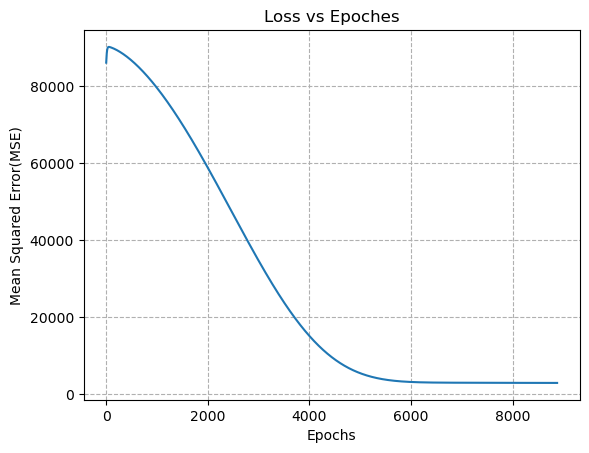

In [28]:
plt.plot(train_loss_l[8:])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error(MSE)')
plt.title('Loss vs Epoches')
plt.grid(linestyle='--')
# plt.plot(test_loss_l[50:], label='test')

In [3]:
file = open('model_final3', 'rb')
model = pickle.load(file)
file.close()

AttributeError: Can't get attribute 'GCN' on <module '__main__'>

In [9]:
file = open('model_final3', 'rb')
model3 = pickle.load(file)
file.close()

edge_to_adj(model3.edge_weight)

EOFError: Ran out of input

In [15]:
len(model_undirected.edge_weight)

741

In [6]:
(38**2 + 38) /2


741.0

In [21]:
model.edge_weight

Parameter containing:
tensor([1.9519e-41, 1.9519e-41, 1.9519e-41,  ..., 1.9519e-41, 1.9519e-41,
        1.9519e-41], requires_grad=True)

In [32]:
save = edge_to_adj(model.edge_weight)
save.to_csv('model4_edges.csv', index=False)

In [4]:
def edge_to_adj(edge_weight):
    x = edge_weight
    m = torch.zeros((39, 39))


    triu_indices = torch.triu_indices(row=39, col=39, offset=1)
    m[triu_indices[0], triu_indices[1]] = x[:741]
    if x.size()[0] > 741: 
        tril_indices = torch.tril_indices(row=39, col=39, offset=-1)
        m[tril_indices[0], tril_indices[1]] = x[741:]

    t_np = m.detach().numpy() #convert to Numpy array
    df = pd.DataFrame(t_np) #convert to a dataframe
    return df

file = open("model_names.txt", "r") 
data = file.read() 
data_into_list = data.split("\n")
file.close() 
names = data_into_list
names.pop(0)
names

['ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'CAMS-CSM1-0',
 'CanESM5 p1',
 'CanESM5 p2',
 'CanESM5-CanOE p2',
 'CESM2',
 'CESM2-WACCM',
 'CIESM',
 'CMCC-CM2-SR5',
 'CNRM-CM6-1 f2',
 'CNRM-CM6-1-HR f2',
 'CNRM-ESM2-1 f2',
 'EC-Earth3',
 'EC-Earth3-Veg',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G p1',
 'GISS-E2-1-G p3',
 'HadGEM3-GC31-LL f3',
 'HadGEM3-GC31-MM f3',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'MCM-UA-1-0',
 'MIROC6',
 'MIROC-ES2L f2',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'UKESM1-0-LL f2']

In [7]:
models = ['model_final3', 'model_final2', 'model_undirected', 'model']
for model in models:
    file = open(model, 'rb')
    model = pickle.load(file)
    file.close()
    edge_df = edge_to_adj(model.edge_weight)
    edge_df.columns = names
    edge_df.index = names
    plt.matshow(edge_df)
    cb = plt.colorbar()

EOFError: Ran out of input

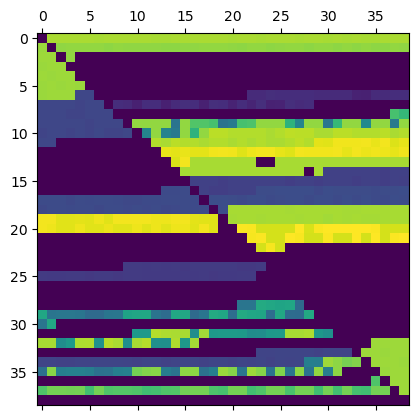

In [60]:
plt.matshow(df)

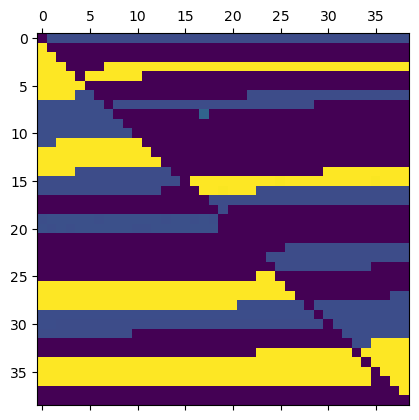

In [56]:
plt.matshow(df)

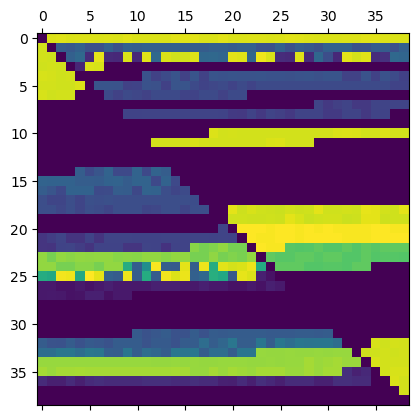

In [42]:
plt.matshow(df)

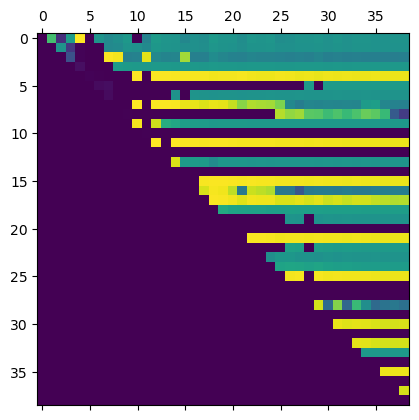

In [21]:
plt.matshow(df)

In [17]:
file = open('model_undirected', 'wb')
pickle.dump(model, file)
file.close()

NameError: name 'pd' is not defined

In [43]:
from torchmetrics import R2Score

r2 = R2Score()
out = model(train_data, None)
# r2 = R2Score(out,train_data.y)
train_loss = F.mse_loss(out, train_data.y)


C:\Users\jqcla\AppData\Local\Temp\ipykernel_5360\392092164.py:6: UserWarning: Using a target size (torch.Size([163800])) that is different to the input size (torch.Size([1, 163800])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  train_loss = F.mse_loss(out, train_data.y)


In [37]:
train_loss

tensor(2964.4084, grad_fn=<MseLossBackward0>)

In [42]:
train_data.x

tensor([[284.5283, 287.5394, 284.8813,  ..., 295.2670, 295.7874, 296.4720],
        [282.4641, 280.2446, 280.3983,  ..., 296.2043, 296.9356, 298.2597],
        [284.2912, 284.0540, 284.1302,  ..., 297.9766, 298.9336, 299.5635],
        ...,
        [283.6683, 283.9431, 283.8918,  ..., 294.2794, 295.5863, 296.7030],
        [284.8356, 285.7901, 287.1679,  ..., 297.3830, 297.6404, 297.9521],
        [284.8099, 284.1621, 282.4539,  ..., 296.9257, 297.4362, 298.1982]])

In [49]:
out = out.flatten()
out

tensor([ 288.5294,  286.4150,  291.2878,  ...,  289.3131, -281.8930,
        -280.8668], grad_fn=<ReshapeAliasBackward0>)

In [50]:
r2(out,train_data.y)

tensor(-98.2444, grad_fn=<SqueezeBackward0>)

In [48]:
train_data.y

tensor([285.1003, 285.9076, 282.4460,  ..., 296.6862, 297.5055, 298.2751])